# Dissertation Code - Role of Energy

In [1]:
#Importing the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
#Importing the data file "Siaya_UPV_Paragraphs"
file_path = '/Users/motunrayoajia/Downloads/Siaya_UPV_Utterances.xls'

#Use the 'read_excel' function from pandas to import the data
data_frame = pd.read_excel(file_path)
print (data_frame)


                     Extract ID  Start Offset  End Offset Sentiment  \
0      637b9ae8424d8c224095c106             0          56   Neutral   
1      637b9ae8424d8c224095c107            58         109  Negative   
2      637b9ae8424d8c224095c108           110         145   Postive   
3      637b9ae8424d8c224095c109           147         177   Neutral   
4      637b9ae8424d8c224095c10a           179         190   Postive   
...                         ...           ...         ...       ...   
16645  638f1443f5e346dd832bb7b9             0          95  Negative   
16646  638f1443f5e346dd832bb7ba             0         300   Neutral   
16647  638f1443f5e346dd832bb7bb             0          92  Negative   
16648  638f1443f5e346dd832bb7bc            93         147  Negative   
16649  638f1443f5e346dd832bb7ca             0         115   Postive   

                                             Annotations  \
0                                          Food Security   
1                     Food 

In [3]:
#Make a subset of the data file
annotations = data_frame[['Interview ID', 'Annotations', 'Item Name', 'Question', 'What is your gender?', 'Marital Status', 'What is your age?', 'What is the highest level of education have you completed?', 'What is the monthly total income of your household (KES)?', 'What extreme climate event are you most worried about?']]
annotations
#demographic_data = data_frame [['Interview ID','What is your gender?', 'Marital Status', 'What is your age?', 'What is the highest level of education have you completed?']]

,Interview ID,Annotations,Item Name,Question,What is your gender?,Marital Status,What is your age?,What is the highest level of education have you completed?,What is the monthly total income of your household (KES)?,What extreme climate event are you most worried about?
0,637b9ae7424d8c224095c0ed,Food Security,Vegetables,Which 5 items are most important to you in you...,Male,Married,38.0,Secondary,5000.0,Drought
1,637b9ae7424d8c224095c0ed,Food Security;Personal performance,Vegetables,Which 5 items are most important to you in you...,Male,Married,38.0,Secondary,5000.0,Drought
2,637b9ae7424d8c224095c0ed,Food Security;Being healthy,Vegetables,Which 5 items are most important to you in you...,Male,Married,38.0,Secondary,5000.0,Drought
3,637b9ae7424d8c224095c0ed,Being healthy,Vegetables,Which 5 items are most important to you in you...,Male,Married,38.0,Secondary,5000.0,Drought
4,637b9ae7424d8c224095c0ed,NaN,Vegetables,Which 5 items are most important to you in you...,Male,Married,38.0,Secondary,5000.0,Drought
...,...,...,...,...,...,...,...,...,...,...
16645,638f1443f5e346dd832bb77b,Preservation of natural environment;Accessibil...,NaN,"In your own words, how would you describe clim...",Female,Married,75.0,Primary,2000.0,Extreme Heat
16646,638f1443f5e346dd832bb77b,Time management,NaN,Describe what has changed in your community in...,Female,Married,75.0,Primary,2000.0,Extreme Heat
16647,638f1443f5e346dd832bb77b,Food Security;Yield,NaN,Why are you most worried about this climate ev...,Female,Married,75.0,Primary,2000.0,Extreme Heat
16648,638f1443f5e346dd832bb77b,Yield,NaN,Why are you most worried about this climate ev...,Female,Married,75.0,Primary,2000.0,Extreme Heat


In [4]:
# Split the words in the 'Annotations' column by semicolon and create a new DataFrame with the split words
split_annotations = data_frame['Annotations'].str.split(';').apply(pd.Series)

#Rename the columns and merge with original dataframe
new_column_names = ['Value 1', 'Value 2', 'Value 3', 'Value 4', 'Value 5', 'Value 6', 'Value 7']
split_annotations.columns = new_column_names

merged_annotations = annotations.merge(split_annotations, left_index=True, right_index=True)

#Drop the original annotations column
merged_annotations.drop(columns=['Annotations'], inplace=True)
merged_annotations

/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_95590/1431691063.py:2: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  split_annotations = data_frame['Annotations'].str.split(';').apply(pd.Series)


,Interview ID,Item Name,Question,What is your gender?,Marital Status,What is your age?,What is the highest level of education have you completed?,What is the monthly total income of your household (KES)?,What extreme climate event are you most worried about?,Value 1,Value 2,Value 3,Value 4,Value 5,Value 6,Value 7
0,637b9ae7424d8c224095c0ed,Vegetables,Which 5 items are most important to you in you...,Male,Married,38.0,Secondary,5000.0,Drought,Food Security,NaN,NaN,NaN,NaN,NaN,NaN
1,637b9ae7424d8c224095c0ed,Vegetables,Which 5 items are most important to you in you...,Male,Married,38.0,Secondary,5000.0,Drought,Food Security,Personal performance,NaN,NaN,NaN,NaN,NaN
2,637b9ae7424d8c224095c0ed,Vegetables,Which 5 items are most important to you in you...,Male,Married,38.0,Secondary,5000.0,Drought,Food Security,Being healthy,NaN,NaN,NaN,NaN,NaN
3,637b9ae7424d8c224095c0ed,Vegetables,Which 5 items are most important to you in you...,Male,Married,38.0,Secondary,5000.0,Drought,Being healthy,NaN,NaN,NaN,NaN,NaN,NaN
4,637b9ae7424d8c224095c0ed,Vegetables,Which 5 items are most important to you in you...,Male,Married,38.0,Secondary,5000.0,Drought,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,638f1443f5e346dd832bb77b,NaN,"In your own words, how would you describe clim...",Female,Married,75.0,Primary,2000.0,Extreme Heat,Preservation of natural environment,Accessibility to services,NaN,NaN,NaN,NaN,NaN
16646,638f1443f5e346dd832bb77b,NaN,Describe what has changed in your community in...,Female,Married,75.0,Primary,2000.0,Extreme Heat,Time management,NaN,NaN,NaN,NaN,NaN,NaN
16647,638f1443f5e346dd832bb77b,NaN,Why are you most worried about this climate ev...,Female,Married,75.0,Primary,2000.0,Extreme Heat,Food Security,Yield,NaN,NaN,NaN,NaN,NaN
16648,638f1443f5e346dd832bb77b,NaN,Why are you most worried about this climate ev...,Female,Married,75.0,Primary,2000.0,Extreme Heat,Yield,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
##Climate Adaptation Items
#Filter the dataframe by climate item question "Given the chosen climate event - which 3 items are most useful to you?"

climate_df = merged_annotations[merged_annotations['Question'] == 'Given the chosen climate event - which 3 items are most useful to you?']
climate_df

,Interview ID,Item Name,Question,What is your gender?,Marital Status,What is your age?,What is the highest level of education have you completed?,What is the monthly total income of your household (KES)?,What extreme climate event are you most worried about?,Value 1,Value 2,Value 3,Value 4,Value 5,Value 6,Value 7
24,637b9ae7424d8c224095c0ed,Irrigation,Given the chosen climate event - which 3 items...,Male,Married,38.0,Secondary,5000.0,Drought,Food Security,NaN,NaN,NaN,NaN,NaN,NaN
25,637b9ae7424d8c224095c0ed,Irrigation,Given the chosen climate event - which 3 items...,Male,Married,38.0,Secondary,5000.0,Drought,Food Security,NaN,NaN,NaN,NaN,NaN,NaN
26,637b9ae7424d8c224095c0ed,Jerrycan,Given the chosen climate event - which 3 items...,Male,Married,38.0,Secondary,5000.0,Drought,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,637b9ae7424d8c224095c0ed,Jerrycan,Given the chosen climate event - which 3 items...,Male,Married,38.0,Secondary,5000.0,Drought,Water Security,NaN,NaN,NaN,NaN,NaN,NaN
28,637b9ae7424d8c224095c0ed,Jerrycan,Given the chosen climate event - which 3 items...,Male,Married,38.0,Secondary,5000.0,Drought,Water Security,Multipurpose,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16636,638f1443f5e346dd832bb77b,Mobile Phone,Given the chosen climate event - which 3 items...,Female,Married,75.0,Primary,2000.0,Extreme Heat,Connection,NaN,NaN,NaN,NaN,NaN,NaN
16637,638f1443f5e346dd832bb77b,Mobile Phone,Given the chosen climate event - which 3 items...,Female,Married,75.0,Primary,2000.0,Extreme Heat,Ease of use,NaN,NaN,NaN,NaN,NaN,NaN
16638,638f1443f5e346dd832bb77b,Mobile Phone,Given the chosen climate event - which 3 items...,Female,Married,75.0,Primary,2000.0,Extreme Heat,Accessibility to services,NaN,NaN,NaN,NaN,NaN,NaN
16639,638f1443f5e346dd832bb77b,Mobile Phone,Given the chosen climate event - which 3 items...,Female,Married,75.0,Primary,2000.0,Extreme Heat,Reliability,Accessibility to services,NaN,NaN,NaN,NaN,NaN


In [6]:

# Initialize an empty list to store the transformed data
trans_climate_df1 = []

# Iterate over each row in the initial table
for _, row in climate_df.iterrows():
    interview_id = row['Interview ID']
    item = row['Item Name']
    gender = row[ 'What is your gender?']
    marital_status = row['Marital Status'] 
    age = row['What is your age?'] 
    education = row['What is the highest level of education have you completed?']
    income = row['What is the monthly total income of your household (KES)?']
    climate_event = row['What extreme climate event are you most worried about?']
    values = [row['Value 1'], row['Value 2'], row['Value 3']]

    # Create a new row for each value
    for value in values:
        trans_climate_df1.append({
            'Interview ID': interview_id,
            'Item Name': item,
            'What is your gender?': gender,
            'Marital Status': marital_status,
            'What is your age?': age,
            'What is the highest level of education have you completed?': education,
            'What is the monthly total income of your household (KES)?': income,
            'What extreme climate event are you most worried about?': climate_event,
            'Values': value
        })

# Create the transformed table
trans_climate_df = pd.DataFrame(trans_climate_df1)

trans_climate_df

,Interview ID,Item Name,What is your gender?,Marital Status,What is your age?,What is the highest level of education have you completed?,What is the monthly total income of your household (KES)?,What extreme climate event are you most worried about?,Values
0,637b9ae7424d8c224095c0ed,Irrigation,Male,Married,38.0,Secondary,5000.0,Drought,Food Security
1,637b9ae7424d8c224095c0ed,Irrigation,Male,Married,38.0,Secondary,5000.0,Drought,NaN
2,637b9ae7424d8c224095c0ed,Irrigation,Male,Married,38.0,Secondary,5000.0,Drought,NaN
3,637b9ae7424d8c224095c0ed,Irrigation,Male,Married,38.0,Secondary,5000.0,Drought,Food Security
4,637b9ae7424d8c224095c0ed,Irrigation,Male,Married,38.0,Secondary,5000.0,Drought,NaN
...,...,...,...,...,...,...,...,...,...
8407,638f1443f5e346dd832bb77b,Mobile Phone,Female,Married,75.0,Primary,2000.0,Extreme Heat,Accessibility to services
8408,638f1443f5e346dd832bb77b,Mobile Phone,Female,Married,75.0,Primary,2000.0,Extreme Heat,NaN
8409,638f1443f5e346dd832bb77b,Mobile Phone,Female,Married,75.0,Primary,2000.0,Extreme Heat,NaN
8410,638f1443f5e346dd832bb77b,Mobile Phone,Female,Married,75.0,Primary,2000.0,Extreme Heat,NaN


In [7]:
#Drop the NaN values in 
climate_df2 = trans_climate_df.dropna(subset=['Values'])
climate_df2

,Interview ID,Item Name,What is your gender?,Marital Status,What is your age?,What is the highest level of education have you completed?,What is the monthly total income of your household (KES)?,What extreme climate event are you most worried about?,Values
0,637b9ae7424d8c224095c0ed,Irrigation,Male,Married,38.0,Secondary,5000.0,Drought,Food Security
3,637b9ae7424d8c224095c0ed,Irrigation,Male,Married,38.0,Secondary,5000.0,Drought,Food Security
9,637b9ae7424d8c224095c0ed,Jerrycan,Male,Married,38.0,Secondary,5000.0,Drought,Water Security
12,637b9ae7424d8c224095c0ed,Jerrycan,Male,Married,38.0,Secondary,5000.0,Drought,Water Security
13,637b9ae7424d8c224095c0ed,Jerrycan,Male,Married,38.0,Secondary,5000.0,Drought,Multipurpose
...,...,...,...,...,...,...,...,...,...
8397,638f1443f5e346dd832bb77b,Mobile Phone,Female,Married,75.0,Primary,2000.0,Extreme Heat,Connection
8400,638f1443f5e346dd832bb77b,Mobile Phone,Female,Married,75.0,Primary,2000.0,Extreme Heat,Ease of use
8403,638f1443f5e346dd832bb77b,Mobile Phone,Female,Married,75.0,Primary,2000.0,Extreme Heat,Accessibility to services
8406,638f1443f5e346dd832bb77b,Mobile Phone,Female,Married,75.0,Primary,2000.0,Extreme Heat,Reliability


In [8]:
#Assign a weight to each value
# Create an empty list to store the calculated weights
weights = []

# Iterate through unique Interview IDs
for interview_id in climate_df2['Interview ID'].unique():
    # Get a subset of the DataFrame for the current Interview ID
    subset = climate_df2[climate_df2['Interview ID'] == interview_id]
    
    # Calculate the count of each item within the current Interview ID
    item_counts = subset['Item Name'].value_counts()
    
    # Map the item counts to the corresponding rows in the subset
    weight_values = subset['Item Name'].map(1 / item_counts).fillna(1)
    
    # Assign the calculated weights to the 'Weight' column in the original DataFrame
    climate_df2.loc[subset.index, 'Weight'] = weight_values

climate_df2

/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_95590/2416906799.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_df2.loc[subset.index, 'Weight'] = weight_values


,Interview ID,Item Name,What is your gender?,Marital Status,What is your age?,What is the highest level of education have you completed?,What is the monthly total income of your household (KES)?,What extreme climate event are you most worried about?,Values,Weight
0,637b9ae7424d8c224095c0ed,Irrigation,Male,Married,38.0,Secondary,5000.0,Drought,Food Security,0.500000
3,637b9ae7424d8c224095c0ed,Irrigation,Male,Married,38.0,Secondary,5000.0,Drought,Food Security,0.500000
9,637b9ae7424d8c224095c0ed,Jerrycan,Male,Married,38.0,Secondary,5000.0,Drought,Water Security,0.333333
12,637b9ae7424d8c224095c0ed,Jerrycan,Male,Married,38.0,Secondary,5000.0,Drought,Water Security,0.333333
13,637b9ae7424d8c224095c0ed,Jerrycan,Male,Married,38.0,Secondary,5000.0,Drought,Multipurpose,0.333333
...,...,...,...,...,...,...,...,...,...,...
8397,638f1443f5e346dd832bb77b,Mobile Phone,Female,Married,75.0,Primary,2000.0,Extreme Heat,Connection,0.166667
8400,638f1443f5e346dd832bb77b,Mobile Phone,Female,Married,75.0,Primary,2000.0,Extreme Heat,Ease of use,0.166667
8403,638f1443f5e346dd832bb77b,Mobile Phone,Female,Married,75.0,Primary,2000.0,Extreme Heat,Accessibility to services,0.166667
8406,638f1443f5e346dd832bb77b,Mobile Phone,Female,Married,75.0,Primary,2000.0,Extreme Heat,Reliability,0.166667


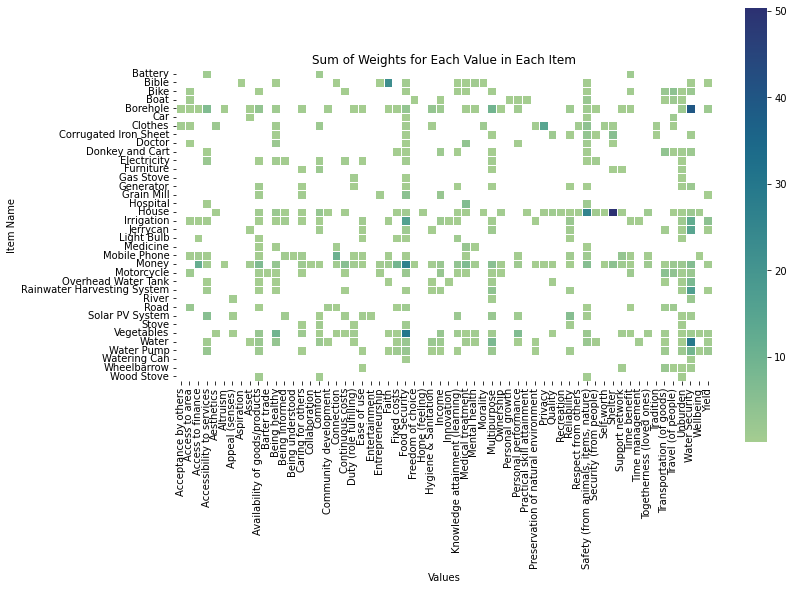

In [9]:
# Create a pivot table with 'Item Name' as index and 'Values' as columns, and calculate the sum of 'Weight' for each combination
pivot_table2 = climate_df2.pivot_table(index='Item Name', columns='Values', values='Weight', aggfunc='sum')

# Create the heatmap using seaborn
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(pivot_table2, cmap='crest', annot=False,linewidths=0.5, fmt='.2f', cbar=True, square=True, xticklabels= True, yticklabels = True)

# Set the plot title and axis labels
plt.title('Sum of Weights for Each Value in Each Item')
plt.xlabel('Values')
plt.ylabel('Item Name')


# Show the plot
plt.show()

In [10]:
#Investigating the influence of items chosen and values extracted

# Energy Enabled Devices

In [11]:
energy_df = pd.read_excel('/Users/motunrayoajia/Downloads/Siaya_UPV_Utterances.xls', sheet_name='Energy')
energy_df = energy_df.iloc[:, :2]

energy_df

#Plot 
energyitem_df = energy_df[energy_df['Energy Enabled'] == 'Yes ']
energyitem_df

,Item Name,Energy Enabled
0,Battery,Yes
2,Bike,Yes
5,Car,Yes
7,Computer,Yes
11,Electricity,Yes
14,Gas Stove,Yes
15,Generator,Yes
16,Grain Mill,Yes
19,Irrigation,Yes
21,Light Bulb,Yes


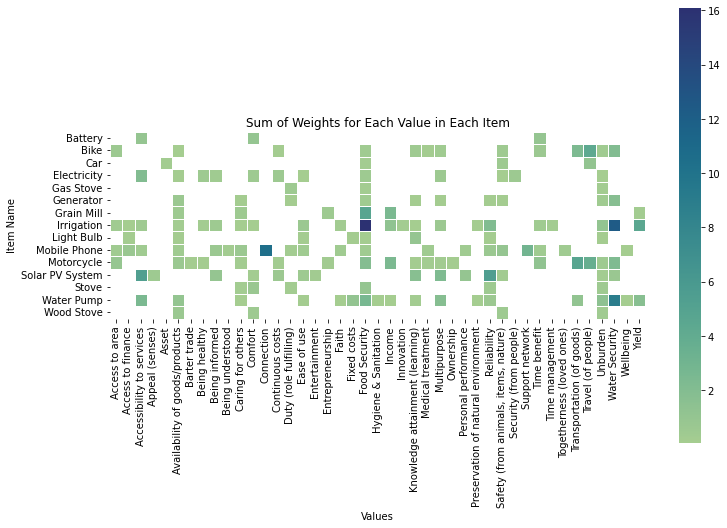

In [12]:
energyitem_df2 = pd.merge(energyitem_df, climate_df2, on='Item Name', how='inner')
energyitem_df2

# Create a pivot table with 'Item Name' as index and 'Values' as columns, and calculate the sum of 'Weight' for each combination
pivot_energy_table = energyitem_df2.pivot_table(index='Item Name', columns='Values', values='Weight', aggfunc='sum')

# Create the heatmap using seaborn
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(pivot_energy_table, cmap='crest', annot=False,linewidths=0.5, fmt='.2f', cbar=True, square=True, xticklabels= True, yticklabels = True)

# Set the plot title and axis labels
plt.title('Sum of Weights for Each Value in Each Item')
plt.xlabel('Values')
plt.ylabel('Item Name')


# Show the plot
plt.show()

In [13]:
energyitem_df2

,Item Name,Energy Enabled,Interview ID,What is your gender?,Marital Status,What is your age?,What is the highest level of education have you completed?,What is the monthly total income of your household (KES)?,What extreme climate event are you most worried about?,Values,Weight
0,Battery,Yes,6384b459b17a7f33f49a602b,Female,Married,42.0,Primary,10000.0,Wildfire,Comfort,1.000000
1,Battery,Yes,638f07da78ae8f1509049814,Female,Married,37.0,Primary,2000.0,Extreme Heat,Accessibility to services,1.000000
2,Battery,Yes,638f1443f5e346dd832bb77b,Female,Married,75.0,Primary,2000.0,Extreme Heat,Time benefit,1.000000
3,Bike,Yes,637ba38c2e7da14daf4a17db,Female,Married,34.0,Primary,5000.0,Drought,Access to area,0.333333
4,Bike,Yes,637ba38c2e7da14daf4a17db,Female,Married,34.0,Primary,5000.0,Drought,Travel (of people),0.333333
...,...,...,...,...,...,...,...,...,...,...,...
705,Wood Stove,Yes,63886735e720c6f2b050a2b2,Female,Widowed,68.0,Primary,1000.0,Extreme Heat,Availability of goods/products,0.333333
706,Wood Stove,Yes,63886735e720c6f2b050a2b2,Female,Widowed,68.0,Primary,1000.0,Extreme Heat,Availability of goods/products,0.333333
707,Wood Stove,Yes,63886735e720c6f2b050a2b2,Female,Widowed,68.0,Primary,1000.0,Extreme Heat,Unburden,0.333333
708,Wood Stove,Yes,638ac06d1e3b0417644ccdf3,Female,Married,27.0,Primary,10000.0,Other,Comfort,0.500000


In [14]:
# Energy Items mapped to Values

In [15]:
climate_df2

,Interview ID,Item Name,What is your gender?,Marital Status,What is your age?,What is the highest level of education have you completed?,What is the monthly total income of your household (KES)?,What extreme climate event are you most worried about?,Values,Weight
0,637b9ae7424d8c224095c0ed,Irrigation,Male,Married,38.0,Secondary,5000.0,Drought,Food Security,0.500000
3,637b9ae7424d8c224095c0ed,Irrigation,Male,Married,38.0,Secondary,5000.0,Drought,Food Security,0.500000
9,637b9ae7424d8c224095c0ed,Jerrycan,Male,Married,38.0,Secondary,5000.0,Drought,Water Security,0.333333
12,637b9ae7424d8c224095c0ed,Jerrycan,Male,Married,38.0,Secondary,5000.0,Drought,Water Security,0.333333
13,637b9ae7424d8c224095c0ed,Jerrycan,Male,Married,38.0,Secondary,5000.0,Drought,Multipurpose,0.333333
...,...,...,...,...,...,...,...,...,...,...
8397,638f1443f5e346dd832bb77b,Mobile Phone,Female,Married,75.0,Primary,2000.0,Extreme Heat,Connection,0.166667
8400,638f1443f5e346dd832bb77b,Mobile Phone,Female,Married,75.0,Primary,2000.0,Extreme Heat,Ease of use,0.166667
8403,638f1443f5e346dd832bb77b,Mobile Phone,Female,Married,75.0,Primary,2000.0,Extreme Heat,Accessibility to services,0.166667
8406,638f1443f5e346dd832bb77b,Mobile Phone,Female,Married,75.0,Primary,2000.0,Extreme Heat,Reliability,0.166667


In [67]:
pivot_table5 = energyitem_df2.pivot_table(index='Item Name', columns='Values', values='Weight', aggfunc='sum')

# Create an empty list to store the values and their corresponding row and column
result_list5 = []

# Loop through each cell in the data frame
for row_index, row in pivot_table5.iterrows():
    for col_index, value in row.items():
        if pd.notna(value) and value > 1.0:
            result_list5.append((row_index, col_index, value))

# Create a new data frame to store the results
result_df5 = pd.DataFrame(result_list5, columns=['Item Name', 'UPV-Label', 'Weight'])

result_df5 = result_df5.sort_values(by='Weight', ascending=False)

result_df5

,Item Name,UPV-Label,Weight
8,Irrigation,Food Security,16.098810
12,Irrigation,Water Security,12.382143
14,Mobile Phone,Connection,10.374459
33,Water Pump,Water Security,8.945833
25,Solar PV System,Reliability,5.450000
22,Solar PV System,Accessibility to services,5.314286
6,Grain Mill,Food Security,4.750000
19,Motorcycle,Transportation (of goods),4.742208
13,Irrigation,Yield,4.504762
1,Bike,Travel (of people),4.310256


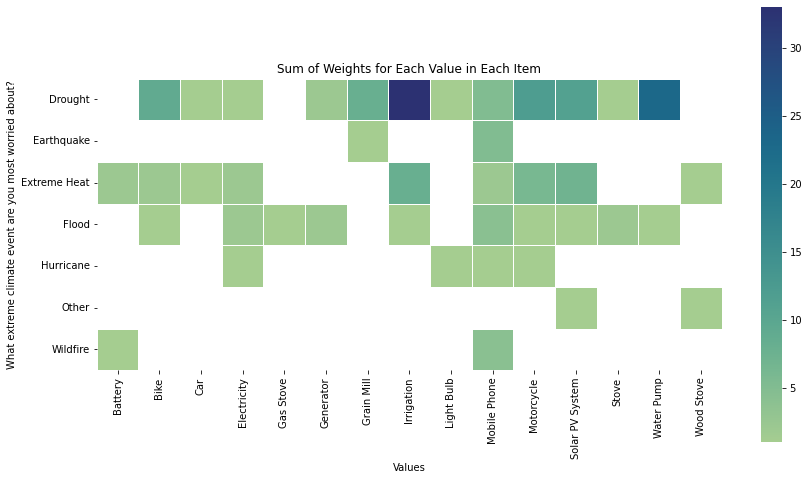

In [17]:
# Create a pivot table with 'Item Name' as index and 'Values' as columns, and calculate the sum of 'Weight' for each combination
pivot_table3 = energyitem_df2.pivot_table(index='What extreme climate event are you most worried about?', columns='Item Name', values='Weight', aggfunc='sum')

# Create the heatmap using seaborn
plt.figure(figsize=(14, 8))  # Set the figure size
sns.heatmap(pivot_table3, cmap='crest', annot=False,linewidths=0.5, fmt='.2f', cbar=True, square=True, xticklabels= True, yticklabels = True)

# Set the plot title and axis labels
plt.title('Sum of Weights for Each Value in Each Item')
plt.xlabel('Values')
plt.ylabel('What extreme climate event are you most worried about?')


# Show the plot
plt.show()

In [35]:
# Create an empty list to store the values and their corresponding row and column
result_list3 = []

# Loop through each cell in the data frame
for row_index, row in pivot_table3.iterrows():
    for col_index, value in row.items():
        if pd.notna(value) and value > 0:
            result_list3.append((row_index, col_index, value))

# Create a new data frame to store the results
result_df3 = pd.DataFrame(result_list3, columns=['What extreme climate event are you most worried about?', 'Column', 'Value'])

result_df3 = result_df3.sort_values(by='Value', ascending=False)

result_df3


,What extreme climate event are you most worried about?,Column,Value
5,Drought,Irrigation,33.0
11,Drought,Water Pump,23.0
8,Drought,Motorcycle,12.0
9,Drought,Solar PV System,11.0
0,Drought,Bike,9.0
18,Extreme Heat,Irrigation,8.0
4,Drought,Grain Mill,8.0
21,Extreme Heat,Solar PV System,7.0
20,Extreme Heat,Motorcycle,6.0
7,Drought,Mobile Phone,5.0


In [36]:
result_df3 = result_df3[result_df3["What extreme climate event are you most worried about?"] != "Other"]

In [39]:
# Filter rows where 'Column' is one of the specified values
selected_columns = ['Motorcycle', 'Irrigation', 'Water pump', 'Mobile Phone']
result_df4 = result_df3[result_df3['Column'].isin(selected_columns)]
result_df4

,What extreme climate event are you most worried about?,Column,Value
5,Drought,Irrigation,33.0
8,Drought,Motorcycle,12.0
18,Extreme Heat,Irrigation,8.0
20,Extreme Heat,Motorcycle,6.0
7,Drought,Mobile Phone,5.0
13,Earthquake,Mobile Phone,5.0
28,Flood,Mobile Phone,4.0
40,Wildfire,Mobile Phone,4.0
19,Extreme Heat,Mobile Phone,2.0
35,Hurricane,Mobile Phone,1.0


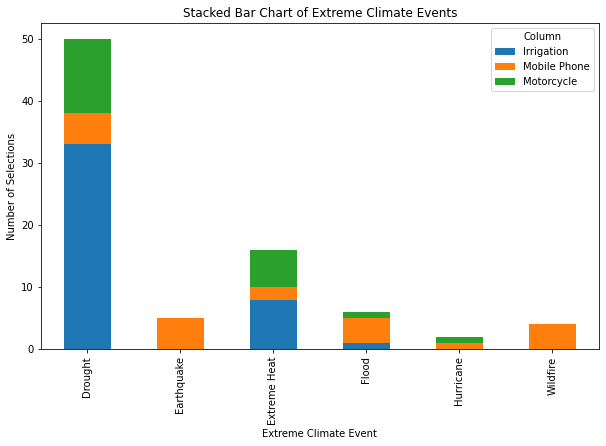

In [40]:
# Pivot the DataFrame to get the data in the desired format for plotting
pivot_df45 = result_df4.pivot(index='What extreme climate event are you most worried about?', columns='Column', values='Value')

# Create the stacked bar chart
ax = pivot_df45.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Extreme Climate Event')
plt.ylabel('Number of Selections')
plt.title('Stacked Bar Chart of Extreme Climate Events')
plt.legend(title='Column')
plt.show()

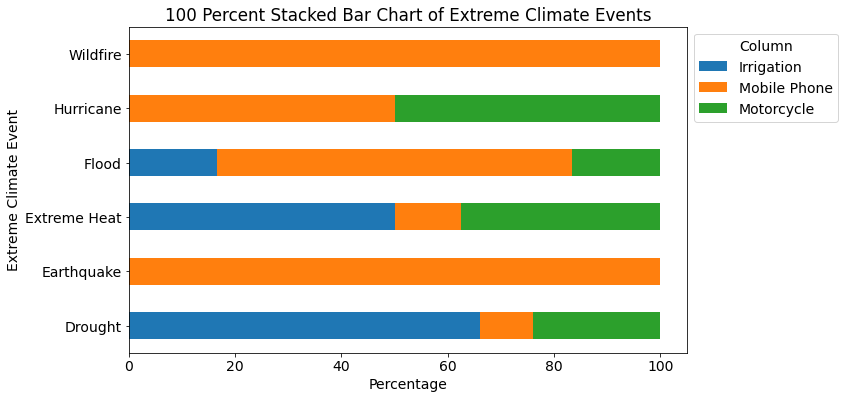

In [41]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

# Pivot the DataFrame to get the data in the desired format for plotting
pivot_df36 = result_df4.pivot(index='What extreme climate event are you most worried about?', columns='Column', values='Value')

# Calculate the total for each row (event) and normalize the data to get percentages
pivot_df_normalized = pivot_df36.div(pivot_df36.sum(axis=1), axis=0) * 100

# Create the 100 percent stacked bar chart
ax = pivot_df_normalized.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.ylabel('Extreme Climate Event')
plt.xlabel('Percentage')
plt.title('100 Percent Stacked Bar Chart of Extreme Climate Events')
plt.legend(title='Column', bbox_to_anchor=(1, 1))
plt.show()

In [42]:
pivot_energy_table

Values,Access to area,Access to finance,Accessibility to services,Appeal (senses),Asset,Availability of goods/products,Barter trade,Being healthy,Being informed,Being understood,...,Support network,Time benefit,Time management,Togetherness (loved ones),Transportation (of goods),Travel (of people),Unburden,Water Security,Wellbeing,Yield
Item Name,,,,,,,,,,,,,,,,,,,,,
Battery,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bike,0.533333,NaN,NaN,NaN,NaN,0.076923,NaN,NaN,NaN,NaN,...,NaN,0.583333,NaN,NaN,2.347436,4.310256,0.333333,2.021368,NaN,NaN
Car,NaN,NaN,NaN,NaN,0.2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN
Electricity,NaN,NaN,2.055556,NaN,NaN,0.142857,NaN,0.500000,0.333333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.111111,NaN,NaN,NaN
Gas Stove,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.250000,NaN,NaN,NaN
Generator,NaN,NaN,NaN,NaN,NaN,0.666667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,1.809524,NaN,NaN
Grain Mill,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250000
Irrigation,0.333333,0.066667,0.428571,NaN,NaN,0.200000,NaN,0.200000,0.500000,NaN,...,NaN,0.333333,0.233333,NaN,NaN,NaN,1.083333,12.382143,NaN,4.504762
Light Bulb,NaN,0.142857,NaN,NaN,NaN,0.142857,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.142857,NaN,NaN,NaN


In [44]:
# Create an empty list to store the values and their corresponding row and column
result_list4 = []

# Loop through each cell in the data frame
for row_index, row in pivot_energy_table.iterrows():
    for col_index, value in row.items():
        if pd.notna(value) and value > 1.0:
            result_list4.append((row_index, col_index, value))

# Create a new data frame to store the results
result_df4 = pd.DataFrame(result_list4, columns=['Item Name', 'UPV', 'Value'])

result_df4 = result_df4.sort_values(by='Value', ascending=False)

result_df4

,Item Name,UPV,Value
8,Irrigation,Food Security,16.098810
12,Irrigation,Water Security,12.382143
14,Mobile Phone,Connection,10.374459
33,Water Pump,Water Security,8.945833
25,Solar PV System,Reliability,5.450000
22,Solar PV System,Accessibility to services,5.314286
6,Grain Mill,Food Security,4.750000
19,Motorcycle,Transportation (of goods),4.742208
13,Irrigation,Yield,4.504762
1,Bike,Travel (of people),4.310256


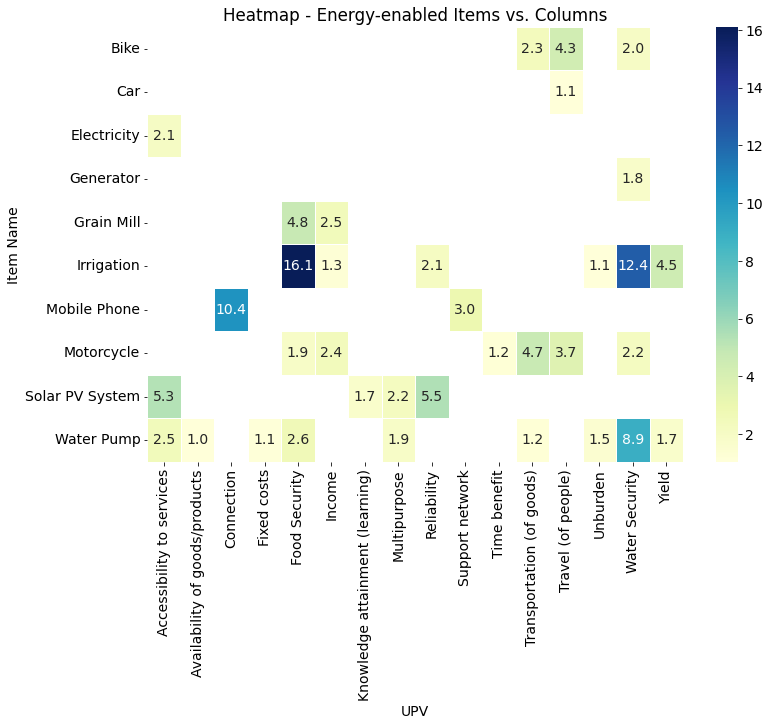

In [45]:
# Pivot the DataFrame to create a heatmap
pivot_df2 = result_df4.pivot(index='Item Name', columns='UPV', values='Value')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df2, annot=True, cmap='YlGnBu', fmt=".1f", linewidths=0.5)

# Set chart title
plt.title('Heatmap - Energy-enabled Items vs. Columns')

# Show the chart
plt.show()

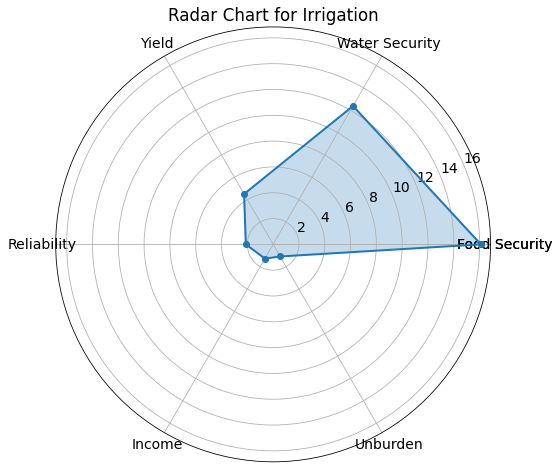

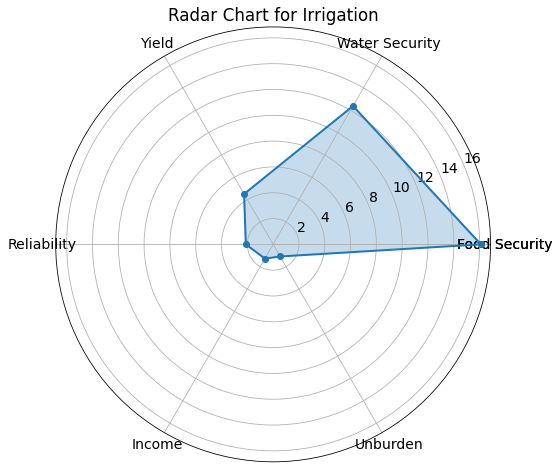

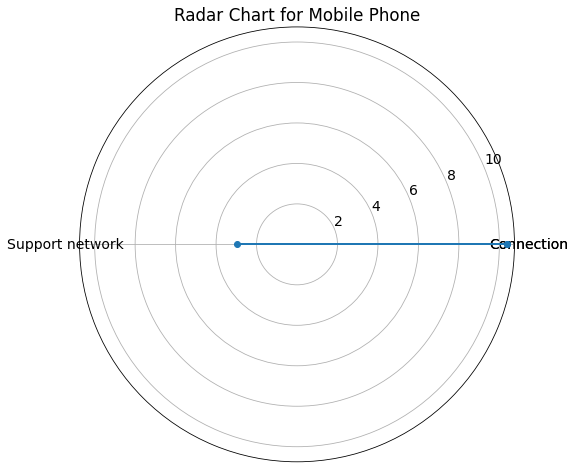

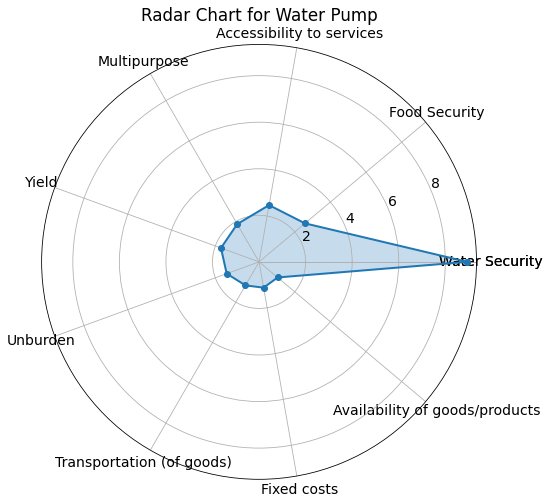

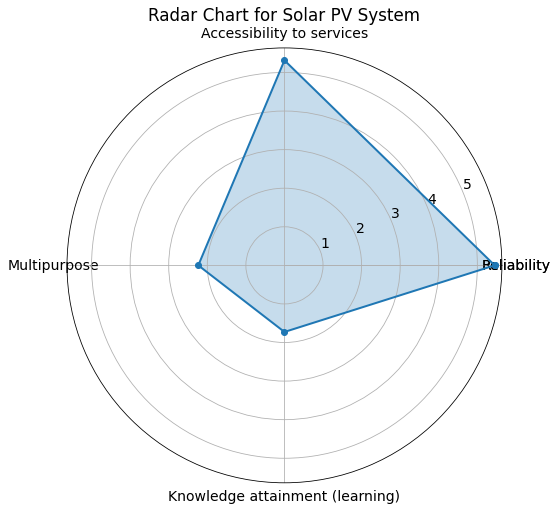

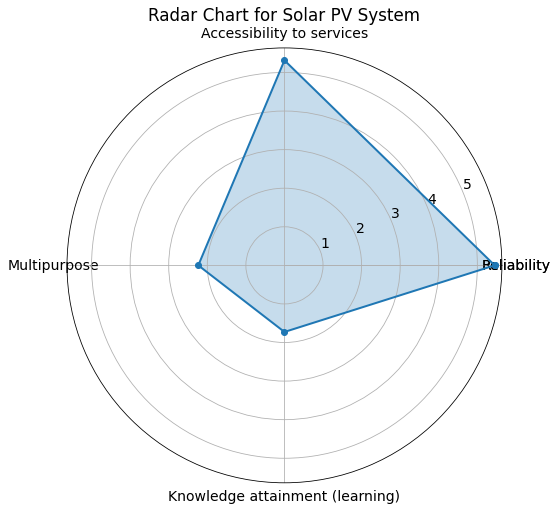

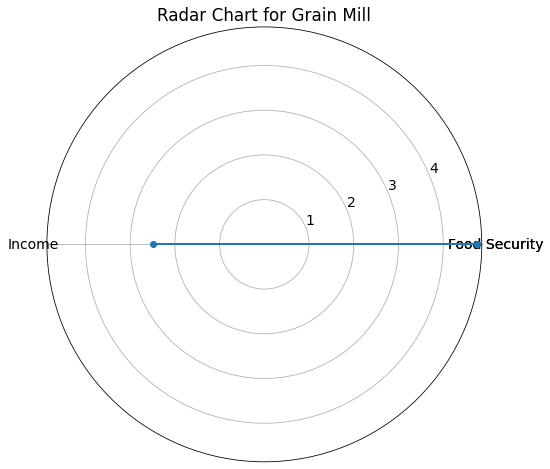

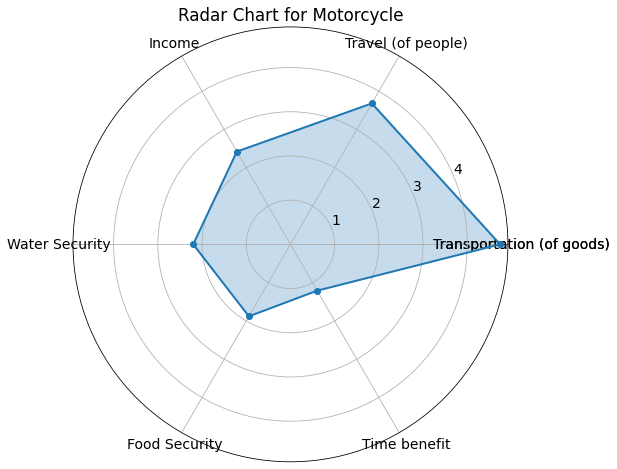

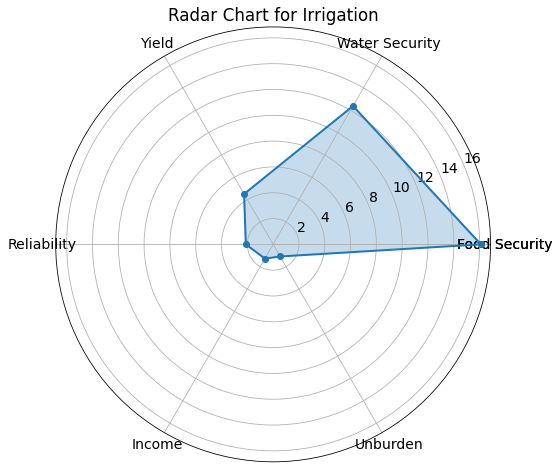

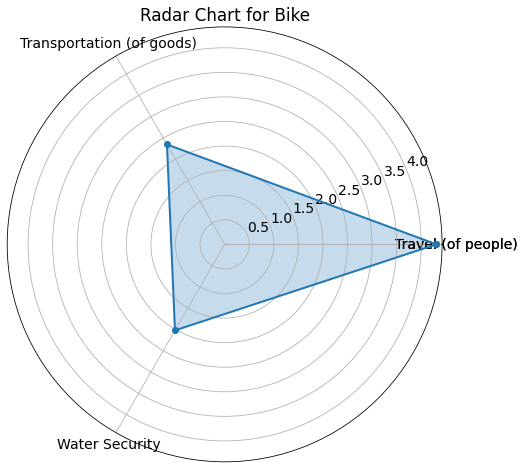

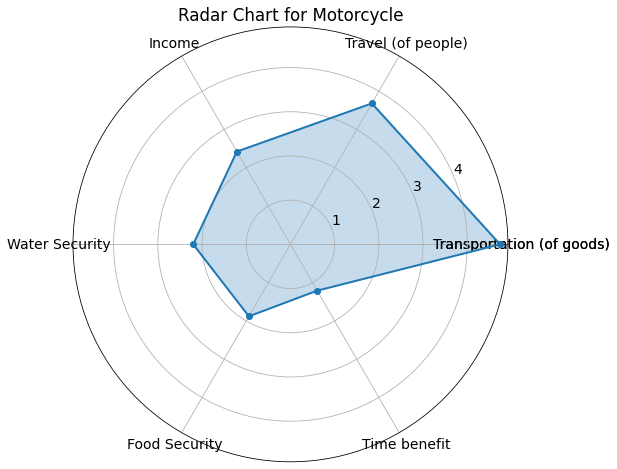

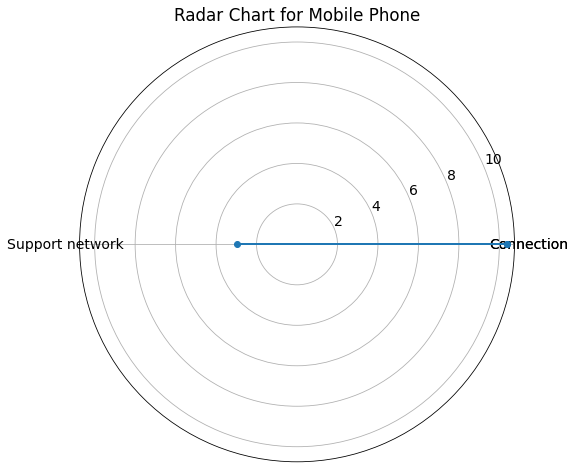

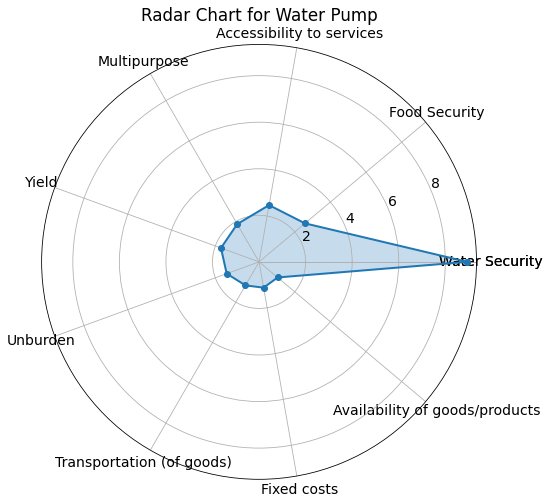

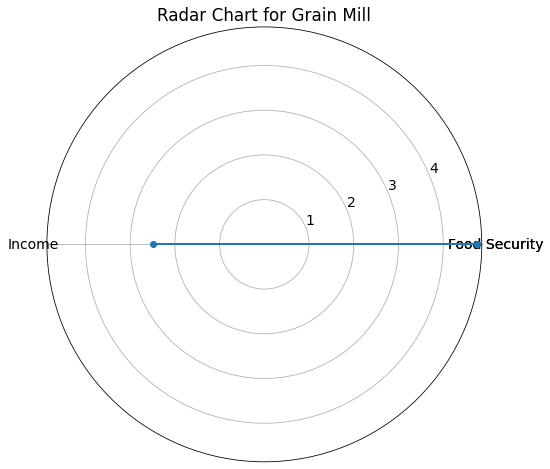

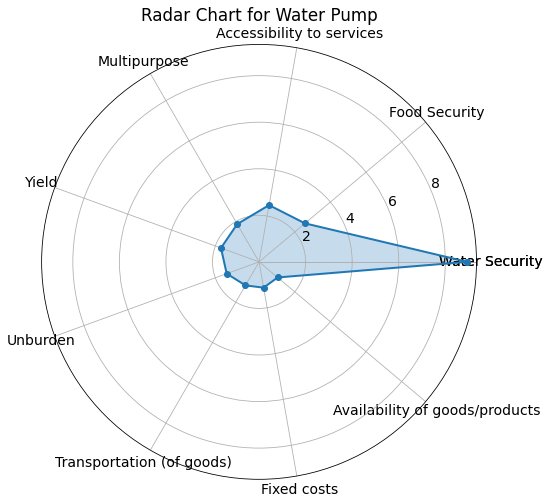

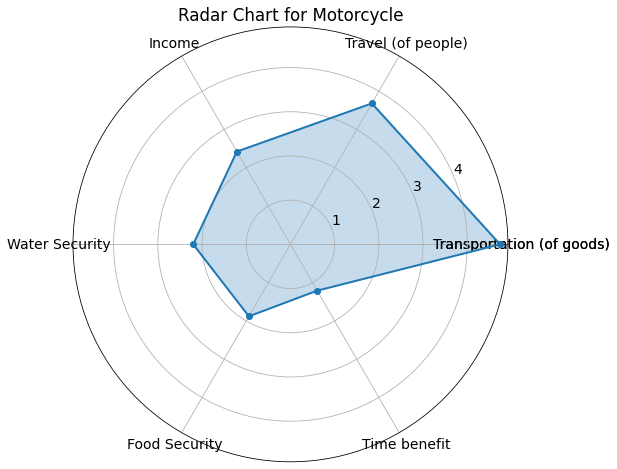

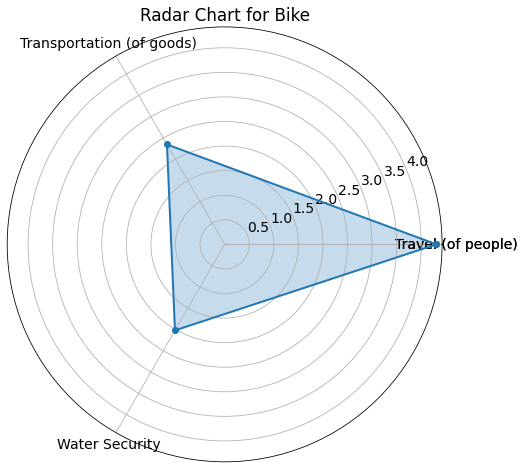

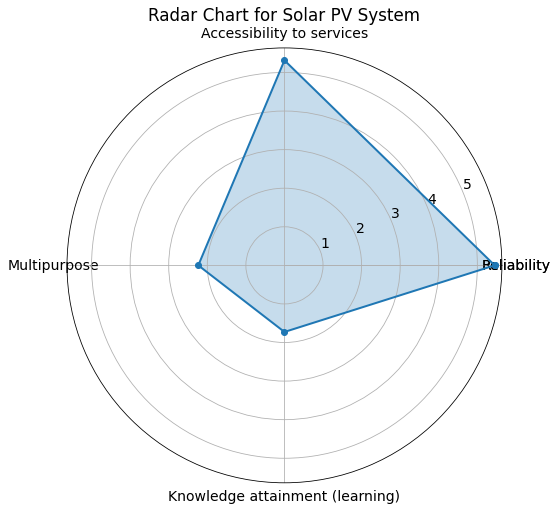

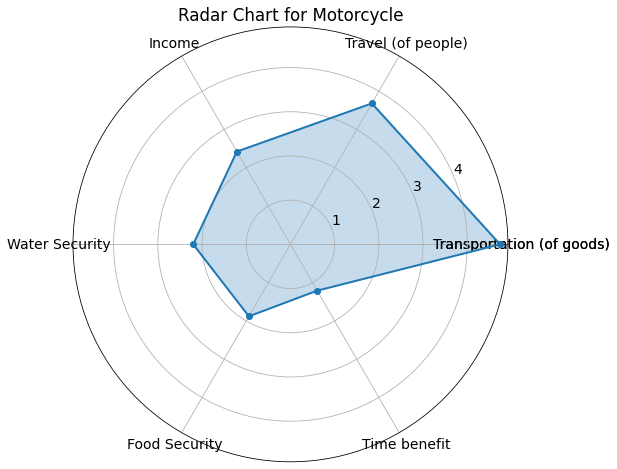

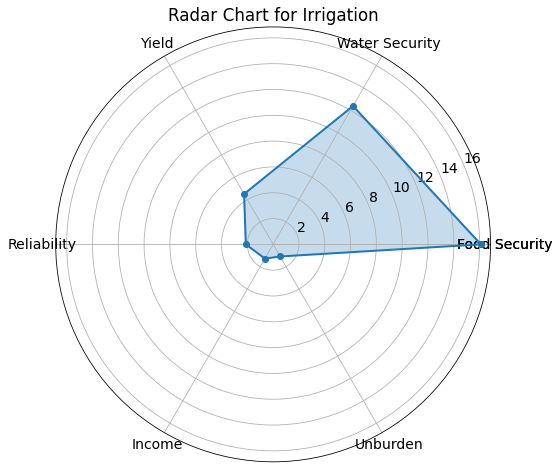

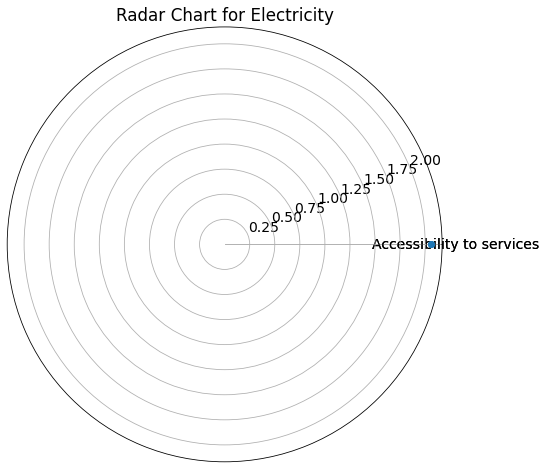

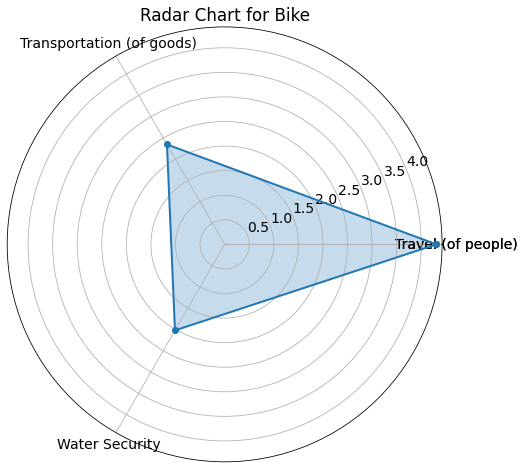

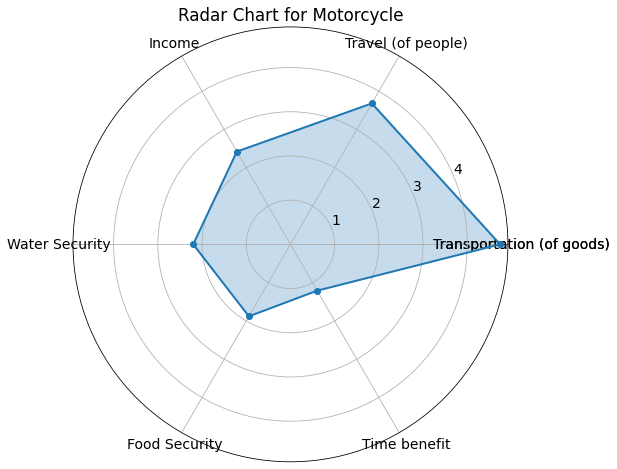

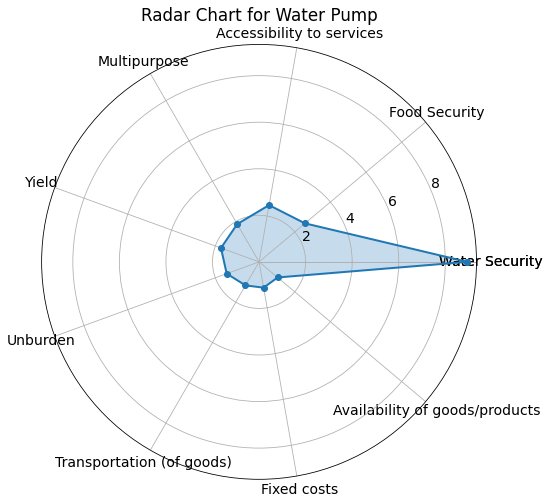

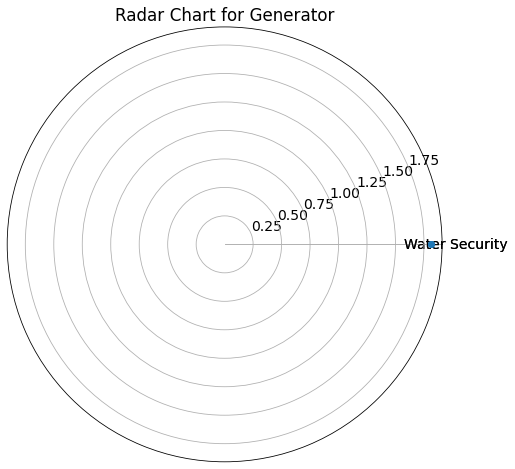

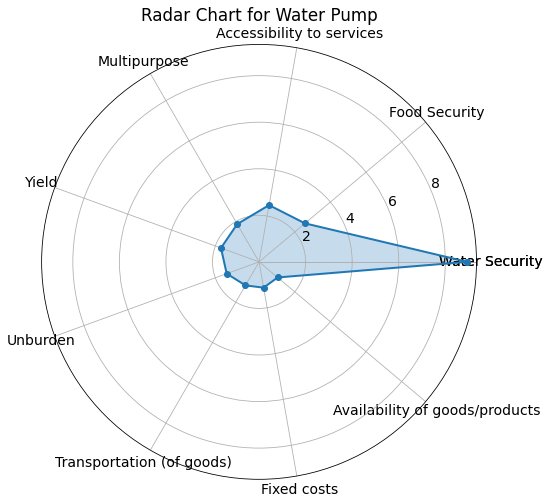

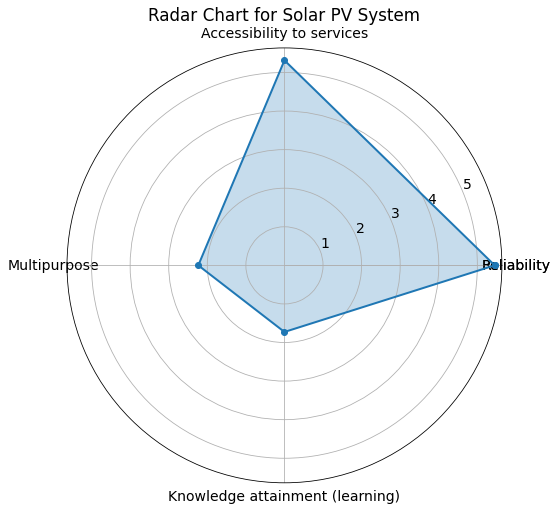

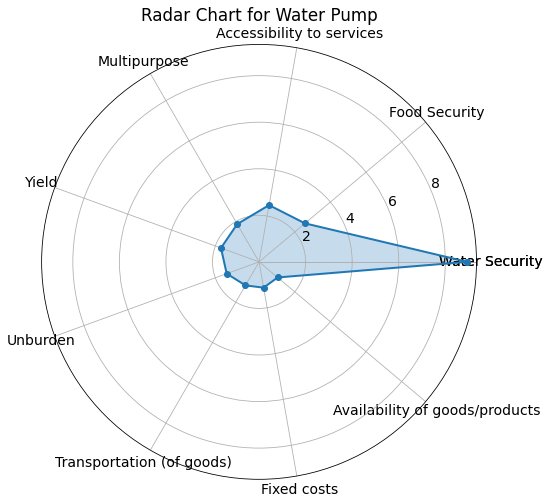

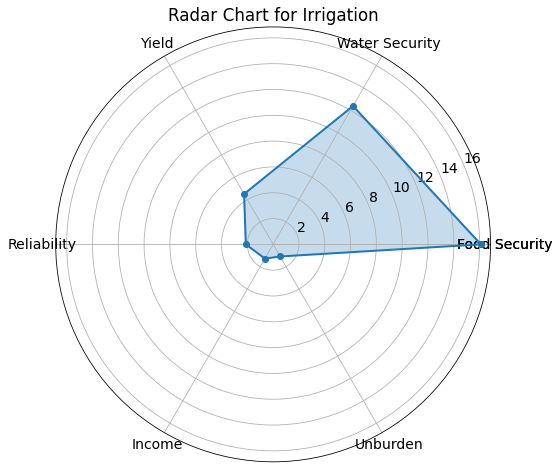

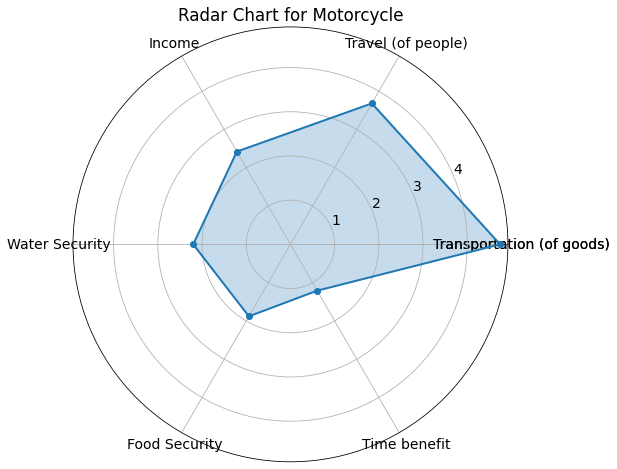

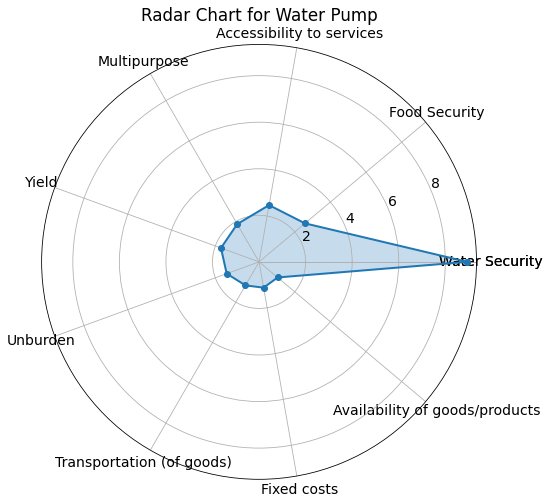

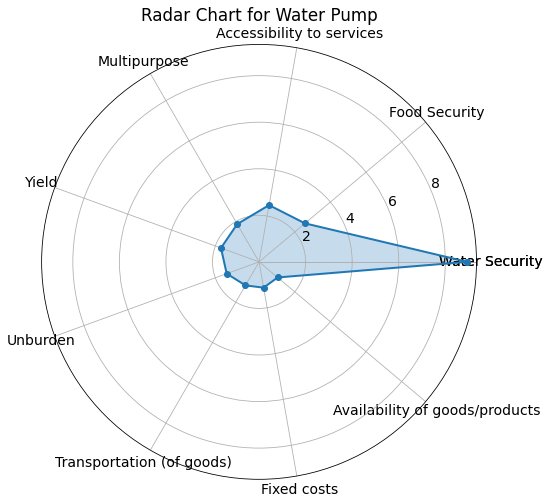

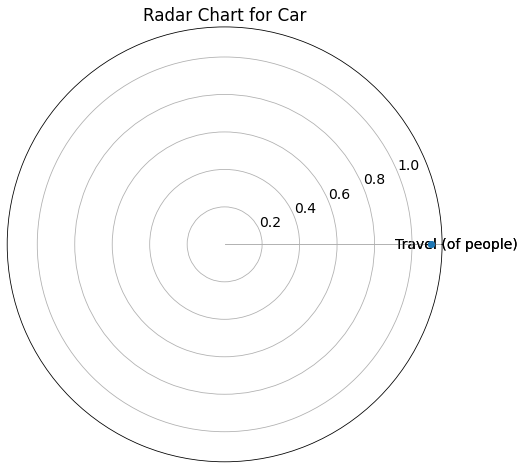

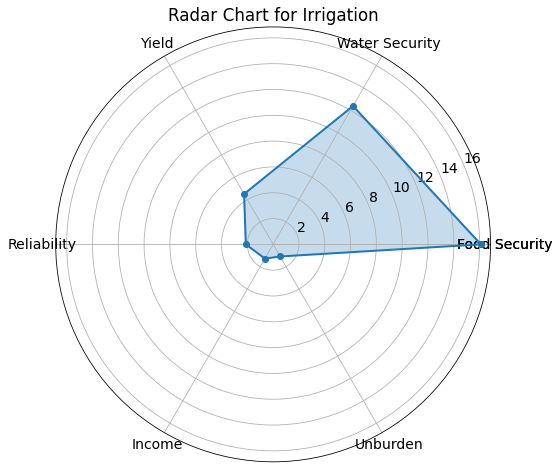

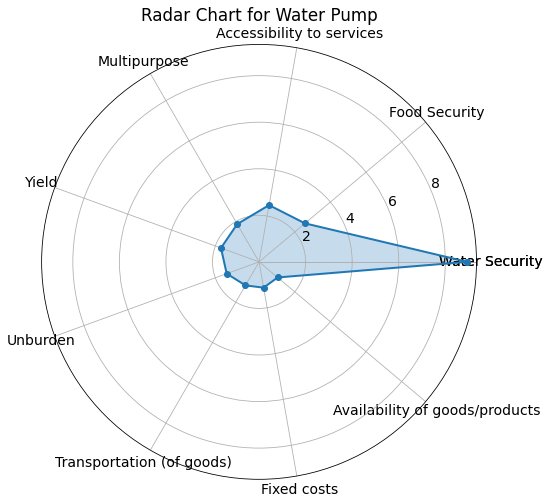

In [46]:
# Iterate through unique items and create radar charts
for item in result_df4['Item Name']:
    subset = result_df4[result_df4['Item Name'] == item]
    values = subset['Value'].tolist()
    variables = subset['UPV'].tolist()

    angles = np.linspace(0, 2 * np.pi, len(variables), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, values + values[:1], 'o-', linewidth=2)
    ax.fill(angles, values + values[:1], alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels=variables + variables[:1])
    ax.set_title(f'Radar Chart for {item}')

    plt.show()

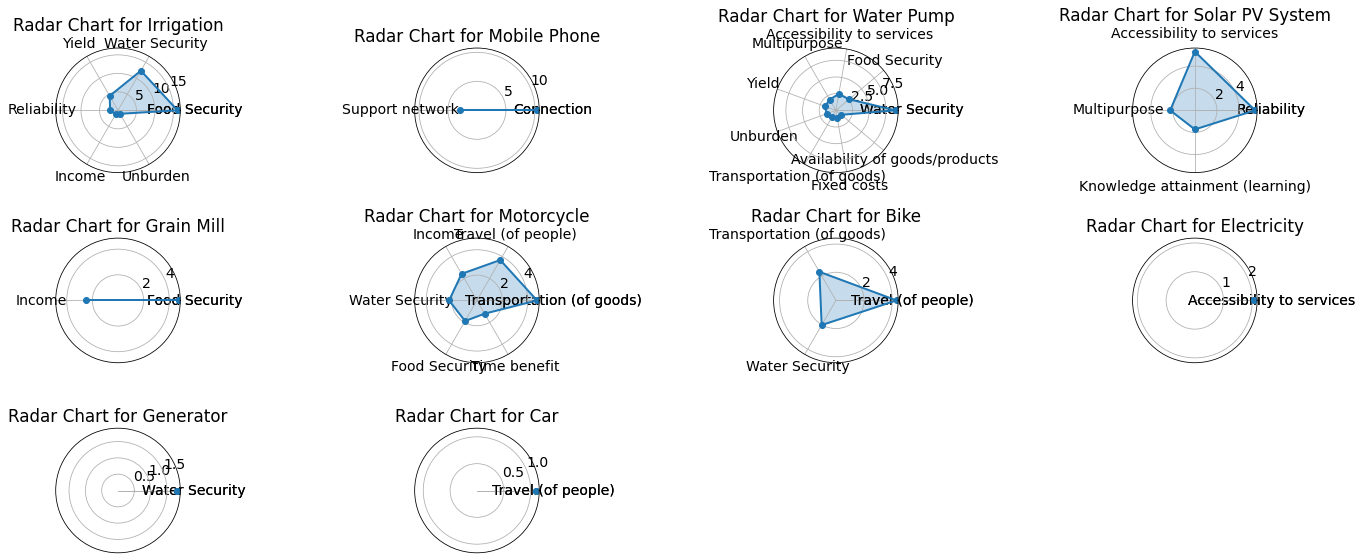

In [47]:
# Calculate the number of rows and columns based on the number of items
num_items = len(result_df4['Item Name'].unique())
num_cols = 4  # Choose a suitable number of columns
num_rows = -(-num_items // num_cols)  # Ceiling division for number of rows

# Create a single figure to hold all radar charts
fig = plt.figure(figsize=(20, 8))

# Iterate through unique items and create radar charts
for i, item in enumerate(result_df4['Item Name'].unique()):
    subset = result_df4[result_df4['Item Name'] == item]
    values = subset['Value'].tolist()
    variables = subset['UPV'].tolist()

    angles = np.linspace(0, 2 * np.pi, len(variables), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))

    ax = fig.add_subplot(num_rows, num_cols, i + 1, polar=True)  # Adjust grid size
    ax.plot(angles, values + values[:1], 'o-', linewidth=2)
    ax.fill(angles, values + values[:1], alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels=variables + variables[:1])
    ax.set_title(f'Radar Chart for {item}')

# Adjust layout and show the single plot with all radar charts
plt.tight_layout()
plt.show()


In [48]:
#Importing the data file "Siaya_UPV_Paragraphs"
energy_2 = pd.read_excel('/Users/motunrayoajia/Downloads/Siaya_UPV_Utterances.xls', sheet_name='Energy_2')

energy_2

,What extreme climate event are you most worried about?,Items
0,Drought,"Irrigation,Jerrycan,Water"
1,Drought,"Bike,Borehole,Clothes"
2,Drought,"House,Borehole,Grain Mill"
3,Flood,"Boat,Corrugated Iron Sheet,Stove"
4,Extreme Heat,"Borehole,Donkey and Cart,Irrigation"
...,...,...
295,Flood,"Boat,Computer,Electricity"
296,Drought,"Bible,Borehole,Bike"
297,Extreme Heat,"House,Jerrycan,Water"
298,Extreme Heat,"Battery,Solar PV System,Torch"


In [49]:
# Split the words in the 'Annotations' column by semicolon and create a new DataFrame with the split words
split_items = energy_2['Items'].str.split(',').apply(pd.Series)

#Rename the columns and merge with original dataframe
new_column_names = ['Item 1', 'Item 2', 'Item 3']
split_items.columns = new_column_names

merged_items = energy_2.merge(split_items, left_index=True, right_index=True)

#Drop the original annotations column
merged_items.drop(columns=['Items'], inplace=True)
merged_items

/var/folders/ly/9bxbh7195y599px69dzx98f40000gp/T/ipykernel_95590/3830178320.py:2: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  split_items = energy_2['Items'].str.split(',').apply(pd.Series)


,What extreme climate event are you most worried about?,Item 1,Item 2,Item 3
0,Drought,Irrigation,Jerrycan,Water
1,Drought,Bike,Borehole,Clothes
2,Drought,House,Borehole,Grain Mill
3,Flood,Boat,Corrugated Iron Sheet,Stove
4,Extreme Heat,Borehole,Donkey and Cart,Irrigation
...,...,...,...,...
295,Flood,Boat,Computer,Electricity
296,Drought,Bible,Borehole,Bike
297,Extreme Heat,House,Jerrycan,Water
298,Extreme Heat,Battery,Solar PV System,Torch


In [50]:
# Initialize an empty list to store the transformed data
trans_energy = []

# Iterate over each row in the initial table
for _, row in merged_items.iterrows():
    climate_event = row['What extreme climate event are you most worried about?']
    items = [row['Item 1'], row['Item 2'], row['Item 3']]

    # Create a new row for each value
    for item in items:
        trans_energy.append({
            'Climate Event': climate_event,
            'Item Name': item })

# Create the transformed table
trans_energy1 = pd.DataFrame(trans_energy)

trans_energy1

,Climate Event,Item Name
0,Drought,Irrigation
1,Drought,Jerrycan
2,Drought,Water
3,Drought,Bike
4,Drought,Borehole
...,...,...
895,Extreme Heat,Solar PV System
896,Extreme Heat,Torch
897,Extreme Heat,Solar PV System
898,Extreme Heat,Battery


In [51]:
# Assuming "df" is your original DataFrame
# Group by "Climate Event" and "Item Name" and calculate the count for each group
grouped_df = trans_energy1.groupby(['Climate Event', 'Item Name']).size().reset_index(name='Count')

# Pivot the grouped DataFrame to have "Climate Event" as rows, "Item Name" as columns, and "Count" as values
pivot_df34 = grouped_df.pivot_table(index='Climate Event', columns='Item Name', values='Count', fill_value=0)

# Reset the index of the pivot DataFrame
pivot_df34.reset_index(inplace=True)

# Display the pivot DataFrame
pivot_df34

Item Name,Climate Event,Battery,Bible,Bike,Boat,Borehole,Car,Clothes,Computer,Corrugated Iron Sheet,...,Solar PV System,Stove,Toilet Squat,Torch,Vegetables,Water,Water Pump,Watering Can,Wheelbarrow,Wood Stove
0,Drought,0.0,9.0,9.0,0.0,72.0,1.0,20.0,1.0,6.0,...,14.0,1.0,1.0,0.0,40.0,34.0,24.0,1.0,1.0,2.0
1,Earthquake,0.0,11.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0
2,Extreme Heat,2.0,2.0,2.0,0.0,7.0,1.0,4.0,0.0,1.0,...,9.0,0.0,0.0,1.0,13.0,15.0,0.0,0.0,1.0,1.0
3,Flood,0.0,2.0,1.0,6.0,0.0,0.0,3.0,1.0,4.0,...,1.0,4.0,0.0,0.0,5.0,0.0,1.0,0.0,3.0,0.0
4,Hurricane,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,Other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
6,Wildfire,1.0,4.0,0.0,0.0,3.0,0.0,1.0,0.0,3.0,...,0.0,0.0,0.0,0.0,7.0,9.0,0.0,1.0,0.0,0.0


In [65]:
# Assuming "energyitem_df" is your DataFrame with the list of energy items
# Assuming "pivot_df" is your pivot DataFrame with "Climate Event" as rows and "Item Name" as columns

# Extract the list of energy items from the "Item Name" column of energyitem_df
energy_items = energyitem_df['Item Name'].tolist()

# Filter the columns of pivot_df to include only energy items
filtered_pivot_df = pivot_df34.loc[:, ['Climate Event'] + energy_items]

# Display the filtered pivot DataFrame
filtered_pivot_df

filtered_pivot_df = filtered_pivot_df[filtered_pivot_df['Climate Event'] != 'Other']

filtered_pivot_df

Item Name,Climate Event,Battery,Bike,Car,Computer,Electricity,Gas Stove,Generator,Grain Mill,Irrigation,Light Bulb,Mobile Phone,Motorcycle,Solar PV System,Stove,Torch,Water Pump,Wood Stove
0,Drought,0.0,9.0,1.0,1.0,1.0,0.0,2.0,14.0,38.0,1.0,6.0,13.0,14.0,1.0,0.0,24.0,2.0
1,Earthquake,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Extreme Heat,2.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,10.0,0.0,2.0,6.0,9.0,0.0,1.0,0.0,1.0
3,Flood,0.0,1.0,0.0,1.0,4.0,2.0,2.0,1.0,1.0,0.0,5.0,1.0,1.0,4.0,0.0,1.0,0.0
4,Hurricane,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6,Wildfire,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


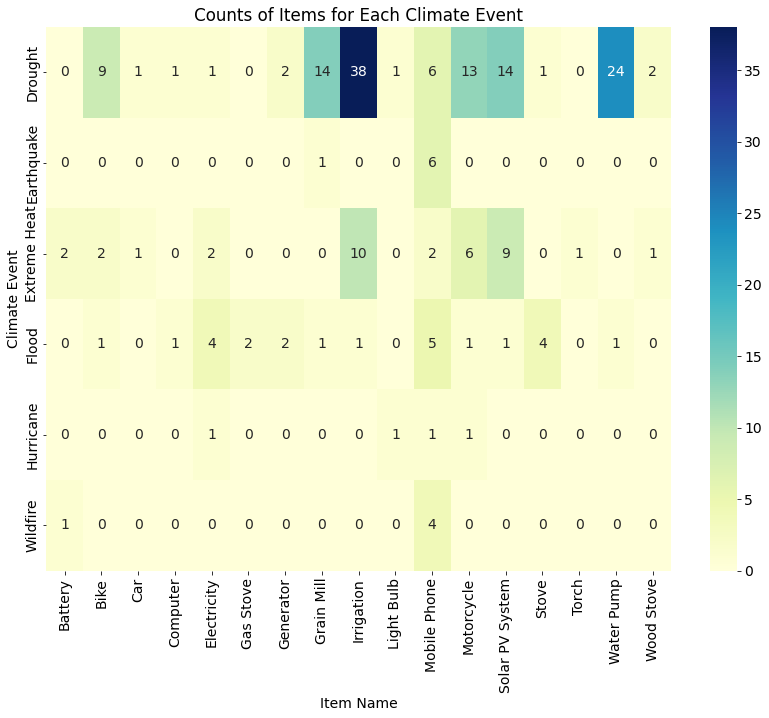

In [66]:
# Assuming "filtered_pivot_df" is your filtered pivot DataFrame

# Set the "Climate Event" column as the index
filtered_pivot_df.set_index('Climate Event', inplace=True)

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(data=filtered_pivot_df, cmap='YlGnBu', annot=True, fmt='.0f')

# Set plot labels and title
plt.ylabel("Climate Event")
plt.xlabel("Item Name")
plt.title("Counts of Items for Each Climate Event")

# Show the plot
plt.show()
